## Keras Model 

Going to import mnist dataset from tensorflow datasets

Then play about with a random neural network setup, the maybe build out
some other ideas like CNN, RNN, or LSTM

In [50]:
import tensorflow as tf

import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Input

tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


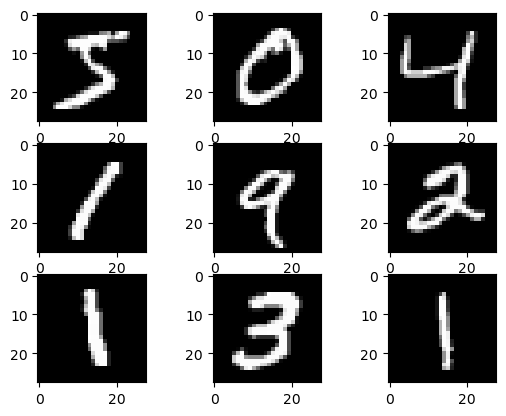

In [51]:
# this outputs a tuple of 2 numpy arrays
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

from tensorflow.keras import layers
from keras.utils import plot_model
import matplotlib.pyplot as plt

plot_model(model, to_file='model.png')

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [52]:
X_train.shape

(60000, 28, 28)

We can infer the number of input dimensions from the pixels in the shape

the images are 28 x 28 - so we will flatten this somehow and then have 784 input dimensions

In [53]:
# flatten the images
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [77]:
# model = Sequential()

# # next define a layer in the Keras network
# model.add(Input(shape=(784,), init='uniform', activation='softmax'))
# model.add(Dense(300, input_dim=784, init='uniform', activation='softmax'))
# model.add(Dense(300, init='uniform', activation='softmax'))
# model.add(Dense(70, init='uniform', activation='softmax'))
# model.add(Dense(10, init='uniform', activation='softmax'))


## Creating the layers
input_layer = Input(shape=(784,))
Layer_1 = Dense(300, activation="softmax")(input_layer)
Layer_2 = Dense(70, activation="softmax")(Layer_1)
Layer_3 = Dense(70, activation="softmax")(Layer_2)
output_layer= Dense(10, activation="softmax")(Layer_3)


In [55]:
scce = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    reduction="auto",
    name="sparse_categorical_crossentropy",
)

In [74]:
##Defining the model by specifying the input and output layers
model = Model(inputs=input_layer, outputs=output_layer)
## defining the optimiser and loss function
model.compile(optimizer='adam',
              loss=scce, metrics=['accuracy'])

## training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test,y_test), verbose=2)

In [75]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[1.32067956e-03, 3.04771890e-03, 9.94077791e-03, ...,
        8.69637609e-01, 6.49034558e-03, 8.72322842e-02],
       [3.30976141e-03, 1.17017161e-02, 9.02751386e-01, ...,
        1.10420333e-02, 9.46419127e-03, 2.66404357e-03],
       [1.20466306e-04, 9.34130430e-01, 5.52390330e-03, ...,
        6.64716261e-03, 3.06533184e-02, 4.30790195e-03],
       ...,
       [1.30798796e-03, 1.12375000e-03, 1.78947002e-02, ...,
        1.91733632e-02, 8.11727345e-03, 4.53993976e-01],
       [1.25889331e-02, 1.15858447e-02, 2.83030532e-02, ...,
        5.47011243e-03, 7.54704177e-01, 2.05472931e-02],
       [1.24394652e-02, 1.36480411e-03, 1.27264699e-02, ...,
        5.60405955e-04, 6.42008800e-03, 7.15446891e-04]], dtype=float32)

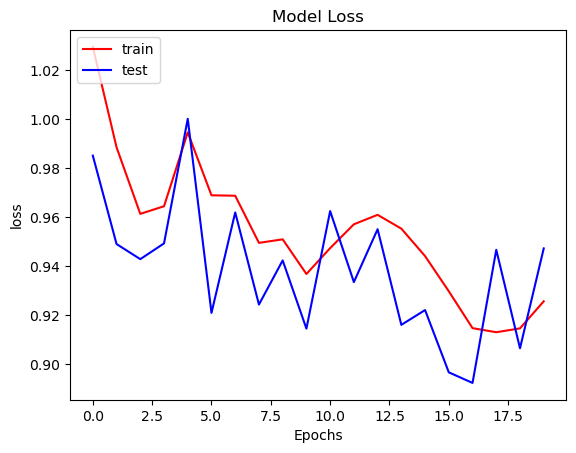

dict_keys(['loss', 'val_loss'])


In [71]:
plt.plot(history.history['loss'], 'r', history.history['val_loss'], 'b')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plt.title("Model Accuracy") ylabel,xlabel, accuracy,epoc 
# plt.plot(history.history['accuracy'], 'r', history.history['val_accuracy'], 'b')


print(history.history.keys())
# epochs = range(1,35)
# plt.plot(epochs, loss_train, 'g', label='Training loss')
# plt.plot(epochs, loss_val, 'b', label='validation loss')
# plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


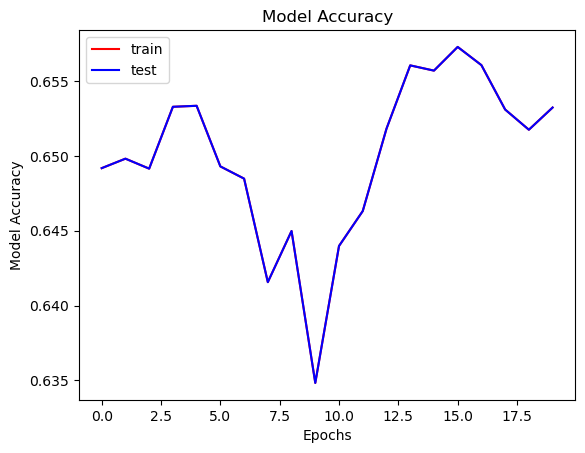

In [76]:

plt.plot(history.history['accuracy'], 'r', history.history['accuracy'], 'b')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Model Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()